# Problem 3
## Problem 11 Chapter 6

We will now try to predict per capita crime rate in the Boston data
set.<br>

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import itertools
import time
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from numpy.linalg import inv
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

InteractiveShell.ast_node_interactivity = "all"
#%matplotlib notebook

/mnt/c/programming/ee379k/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
def plotMSE(alphas, scores):
    fig = plt.figure()
    _ = plt.semilogx(alphas, scores)
    _ = plt.title(r'MSE as $\alpha$ increases')
    _ = plt.xlabel(r'$\alpha$')
    _ = plt.ylabel('MSE')
    
def plotR(alphas, scores):
    fig = plt.figure()
    _ = plt.semilogx(alphas, scores)
    _ = plt.title(r'R values as $\alpha$ increases')
    _ = plt.xlabel(r'$\alpha$')
    _ = plt.ylabel('R')

In [3]:
# Load the data
filepath = '../../datasets/ISLR/data/csv/'
filename = 'Boston.csv'
df = pd.read_csv(filepath + filename)

In [4]:
# Get a numpy array and scale the data
values = df.values
#scaled_data = values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(values)

In [5]:
#print(df.columns)
#df.isnull().sum()
#print(scaled_data.shape)
X = scaled_data[:,1:]
y = scaled_data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Part A
Try out some of the regression methods explored in this chapter,
such as best subset selection, the lasso, ridge regression, and
PCR. Present and discuss results for the approaches that you
consider.

In [6]:
# Keep track of the different model scores
scores = {}
r_vals = {}

#### $L^1$ Regularization (Lasso)

In [7]:
# Train using gridsearch cv
#alphas = np.logspace(-3, 0.5, num=10)
#parameters = {'alpha':alphas}
#lasso = Lasso()

#model = GridSearchCV(lasso, parameters, cv=5, return_train_score=True)
#_ = model.fit(X_train, y_train)
#y_hat = model.predict(X_test)
#score = mean_squared_error(y_test, y_hat)

In [8]:
# Tune by hand
alphas = np.logspace(-4, 0, num=10)
lasso_scores = []
lasso_rvalues = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.0001)
    _ = lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    r_val = lasso.score(X_test, y_test)
    lasso_rvalues.append(r_val)
    lasso_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
0.0001


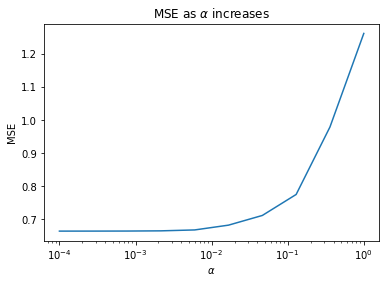

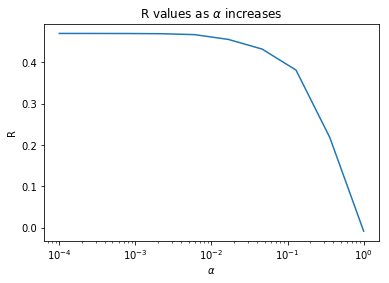

In [9]:
plotMSE(alphas, lasso_scores)
plotR(alphas, lasso_rvalues)

best_alpha = alphas[np.argmin(np.array(lasso_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
scores['Lasso'] = np.amin(np.array(lasso_rvalues))
scores['Lasso'] = np.amin(lasso_scores)

In [10]:
# I want to see the weights chosen by Lasso
lasso = Lasso(alpha=best_alpha, tol=0.0001)
_ = lasso.fit(X_train, y_train)

keys = df.columns.values.tolist()
_ = keys.pop(0)
values = lasso.coef_
weights = dict(zip(keys, values))
for k, v in weights.items():
    print('{}:   {}'.format(k, v))

age:   -0.02790299359733042
nox:   -0.11616940871556543
black:   -0.056191337491865265
zn:   0.1180897416116192
rad:   0.5754407714607461
lstat:   0.05550260648654278
ptratio:   -0.053871643789786934
chas:   -0.005312793582877186
tax:   -0.07101066037815777
medv:   -0.2624944742835852
indus:   -0.05943217680876339
rm:   0.05901864453309198
dis:   -0.26266123791521867


#### $L^1$ Regularization (w/Feature Engineering)

In [11]:
# Try dropping zero columns and adding polynomial versions of non-zero columns
df_copy = df.copy()
#drops = list(weights.keys()[weights.values() == 0])
keeps = []
for item in weights.items():
    if abs(item[1]) >= 0.08:
        #print(item[1])
        keeps.append(item)

keeps = [x[0] for x in keeps]
df_copy = df_copy[keeps]

# Get a numpy array and scale the data
values_copy = df_copy.values
#scaled_data_copy = values_copy
scaler_copy = StandardScaler()
scaled_data_copy = scaler_copy.fit_transform(values_copy)

# Make PolynomialFeatures object
poly = PolynomialFeatures(2)
poly_data = poly.fit_transform(scaled_data_copy)

X_train, X_test, y_train, y_test = train_test_split(poly_data, scaled_data[:,0])

In [12]:
print(df_copy.columns)

Index(['nox', 'zn', 'rad', 'medv', 'dis'], dtype='object')


In [13]:
# Tune by hand
alphas = np.logspace(-4, -0.2, num=10)
lasso_scores = []
lasso_rvalues = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, tol=0.0001)
    _ = lasso.fit(X_train, y_train)
    pred = lasso.predict(X_test)
    r_val = lasso.score(X_test, y_test)
    lasso_rvalues.append(r_val)
    lasso_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
0.0018478497974222907


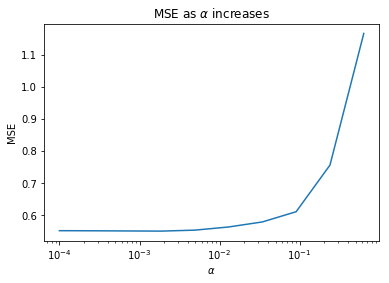

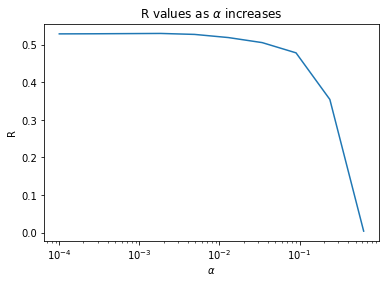

In [14]:
plotMSE(alphas, lasso_scores)
plotR(alphas, lasso_rvalues)

best_alpha = alphas[np.argmin(np.array(lasso_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Lasso-Poly'] = np.amin(np.array(lasso_rvalues))
scores['Lasso-Poly'] = np.amin(lasso_scores)

#### $L^2$ Regularization with columns chosen by $L^1$

We grab the non-zeroed columns from Lasso and perform Ridge on them.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data_copy, scaled_data[:,0])

In [16]:
# Tune by hand
alphas = np.logspace(1, 3, num=10)
lasso_ridge_scores = []
lasso_ridge_rvalues = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, tol=0.0001)
    _ = ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    r_val = ridge.score(X_test, y_test)
    lasso_ridge_rvalues.append(r_val)
    lasso_ridge_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
10.0


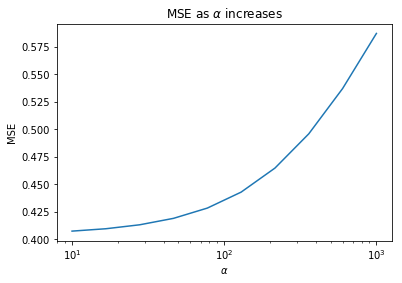

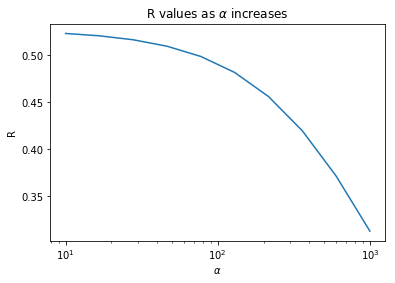

In [17]:
plotMSE(alphas, lasso_ridge_scores)
plotR(alphas, lasso_ridge_rvalues)

best_alpha = alphas[np.argmin(np.array(lasso_ridge_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Lasso-Ridge-Combo'] = np.amin(np.array(lasso_ridge_rvalues))
scores['Lasso-Ridge-Combo'] = np.amin(lasso_ridge_scores)

#### $L^2$ Regularization (Ridge)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data[:,1:], scaled_data[:,0])

In [19]:
#alphas = np.logspace(-3, 1, num=10)
#parameters = {'alpha':alphas}
#ridge = Ridge()
#model = GridSearchCV(ridge, parameters, cv=5, return_train_score=True)
#_ = model.fit(scaled_data[:,1:], scaled_data[:,0])
#y_hat = model.predict(X_test)
#score = mean_squared_error(y_test, y_hat)
#scores['Ridge'] = score
#print(score)

In [20]:
# Tune by hand
alphas = np.logspace(-1, 2, num=10)
ridge_scores = []
ridge_rvals = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, tol=0.0001)
    _ = ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    r_val = ridge.score(X_test, y_test)
    ridge_rvals.append(r_val)
    ridge_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
0.1


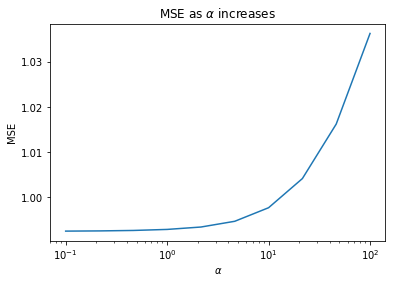

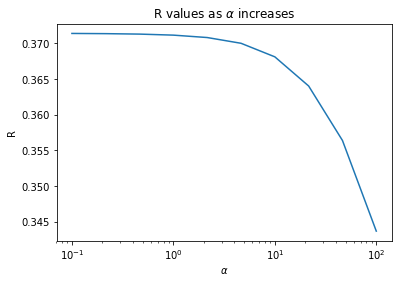

In [21]:
plotMSE(alphas, ridge_scores)
plotR(alphas, ridge_rvals)

best_alpha = alphas[np.argmin(np.array(ridge_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Ridge'] = np.amin(np.array(ridge_rvals))
scores['Ridge'] = np.amin(ridge_scores)

In [22]:
# I want to see the weights chosen by Ridge
keys = df.columns.values.tolist()
_ = keys.pop(0)
values = ridge.coef_
weights = dict(zip(keys, values))
for k, v in weights.items():
    print('{}:   {}'.format(k, v))

age:   0.02739045642066733
nox:   -0.002003544495737815
black:   -0.10662184625545186
zn:   0.06134934443225899
rad:   0.2699785624724983
lstat:   0.08629503918148118
ptratio:   0.005033748888331357
chas:   -0.02512175211554057
tax:   0.11994241564478338
medv:   -0.07342454537816963
indus:   -0.0343293019235305
rm:   -0.022941846241958736
dis:   -0.08280423495717693


#### $L^2$ Regularization (w/Feature Engineering)

In [23]:
# Make new Ridge and fit again using polydata
X_train, X_test, y_train, y_test = train_test_split(poly_data, scaled_data[:,0])

# Tune by hand
alphas = np.logspace(-1.5, 2, num=10)
ridge_scores = []
ridge_rvalues = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha, tol=0.0001)
    _ = ridge.fit(X_train, y_train)
    pred = ridge.predict(X_test)
    r_val = ridge.score(X_test, y_test)
    ridge_rvalues.append(r_val)
    ridge_scores.append(mean_squared_error(pred, y_test))

The best alpha was:
0.03162277660168379


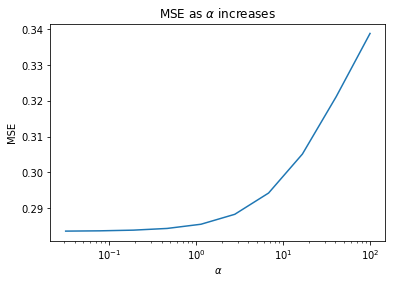

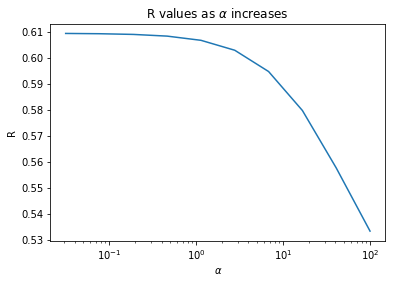

In [24]:
plotMSE(alphas, ridge_scores)
plotR(alphas, ridge_rvalues)

best_alpha = alphas[np.argmin(np.array(ridge_scores))]
print('The best alpha was:')
print(best_alpha)

# Add to list
r_vals['Ridge-Poly'] = np.amin(np.array(ridge_rvals))
scores['Ridge-Poly'] = np.amin(ridge_scores)

In [25]:
print("MSE Scores:")
for k, v in scores.items():
    print('{}:   {}'.format(k, v))

print('')
print("R Values:")
for k, v in r_vals.items():
    print('{}:   {}'.format(k, v))

MSE Scores:
Lasso-Ridge-Combo:   0.4072990356125501
Ridge:   0.9925118789194689
Lasso:   0.6638735472657933
Ridge-Poly:   0.2836203380974229
Lasso-Poly:   0.5497964072573027

R Values:
Lasso-Ridge-Combo:   0.3131575420074627
Ridge:   0.34369422019468643
Lasso-Poly:   0.0038797808475485858
Ridge-Poly:   0.34369422019468643


#### Principal Components Regression

In [26]:
# Grab fresh data and perform PCA
X = scaled_data[:,1:]
y = scaled_data[:,0]
pca = PCA(n_components=4)
X_transformed = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y)

In [27]:
model = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10, tol=None)
_ = model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(pred, y_test)
print(mse)

0.37479537662697515


#### Best Subset Selection

In [28]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X)
    regr = model.fit()
    RSS = ((regr.predict(X - y) ** 2).sum())
    return {"model":regr, "RSS":RSS}

In [29]:
def getBest(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    print(results)
    # Choose the model with the highest RSS
    best_model = models.iloc[:, models['RSS'].idxmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [30]:
X = df.drop('crim', axis=1)
y = df.iloc[:, df.columns != 'crim']
models = pd.DataFrame(columns=['RSS', 'model'])
tic = time.time()

for i in range(1,12):
    models.loc[i] = getBest(i)
    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")

[{'RSS': 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64, 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3ca62ad0b8>}, {'RSS': 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64, 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3ca62bd400>}, {'RSS': 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64, 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3ca62ad208>}, {'RSS': 0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64, 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f3

TypeError: reduction operation 'argmin' not allowed for this dtype

### Part B
Propose a model (or set of models) that seem to perform well on
this data set, and justify your answer. Make sure that you are
evaluating model performance using validation set error, crossvalidation,
or some other reasonable alternative, as opposed to
using training error.

Repeated runs show that the MSE for different models and alphas fluctuates from approximately 0.2 to 1.5. On average, Lasso and PCR tend to perform better. The one that consistenly performed the best overall was running Lasso and then setting a threshold to drop columns based on Lasso coefficients, then running Ridge on the remaining columns. The lowest score was 0.103 with this method. The MSE used here is test error, not training error.

### Part C
Does your chosen model involve all of the features in the data
set? Why or why not?

Lasso and PCR both neglect specific features by design. Again, the MSE fluctuated wildly but Lasso consistently nearly zeroed out 4-7 columns, while PCR tended to work well with n_components between 2 and 6. The method with Lasso and Ridge also dropped features deemed not relevant.